![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4895752%2F391fac1718d81b6c7cf0b53eb231d562%2Finbox_4895752_5e4735cb769c6be5f5872a052d0007e2_841520521_preview_20170113163124_2.jpg?generation=1597574096430659&alt=media)

# Modelos de regresión

**Autor/es:**
+ Giovanni Barra
+ Erwin Nuñez
+ Luis Saez

**Correos Electrónicos:**
+ gio.barra@duocuc.cl
+ er.nunez@duocuc.cl
+ lu.saezd@duocuc.cl

**Fecha de Creación:** 15 de Octubre del 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación de modelos de regresión de la asignatura de Fundamentos de Machine Learning de la carrera de Ingeniería en informática de DuocUC - Sede Concepción

# Preparación del Entorno de trabajo

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import lmplot, boxplot, violinplot, kdeplot
from tabulate import tabulate
import random
import scipy.stats as stats
from ipywidgets import interactive
from scipy.stats import norm
import math
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

In [2]:
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2024-10-16 12:42:38--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2024-10-16 12:42:38--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd37dbbfcfd7e740c007dce34ec.dl.dropboxusercontent.com/cd/0/inline/Ccj-3JMsQooG1Knzo0Y8EH0QprWNwL0fjBgwhr8UuYfTbbVcVE4Q-XW18fMsn505DsVWttjLQrZyIbDhhy9Cr9GsK0a7v2OvfbaDhe4IlFH6VnbWA8eE5OYgm6b0AFlb9500MSUrUa0CeGYvx69UvPZT/file# [following]
--2024-10-16 12:42:41--  https://ucd37dbbfcfd7e740c007dce34ec.dl.dropboxus

In [3]:
def interpretacion(algoritmo : str, caracteristicas : np.array, score : float):
  print(f"""Modelo de regresión {algoritmo} {score :.2%} de la variabilidad de tiempo que demora un jugador en realizar la primera
kill de la ronda se puede explicar utilizando las {len(caracteristicas)} caracteristicas.
Caracteristicas elegidas :{caracteristicas.values}.""")

def mae_interpretacion(modelo : str, value : float):
  print(f"""MAE: El modelo '{modelo}' pudo predecir que el tiempo que demora un jugador en realizar la primera kill de la ronda es ± {value:.2f} segundos del tiempo real.""")

def msle_interpretacion(modelo : str, value : float):
  print(f"""MSLE: El modelo '{modelo}' pudo predecir el tiempo que demora un jugador en realizar la primera
kill de la ronda es de  ± {value: .2%} del tiempo real.""")


In [4]:
counter_strike = pd.read_csv('demo_round_traces.csv', sep=';')
counter_strike.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176


In [5]:
counter_strike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

# Fase 1: Análisis del negocio

## Introducción:

Se nos entregó un conjunto de datos que contiene los resultados de unas partidas competitivas de Counter-Strike, donde podemos contemplar el rendimiento de los jugadores en las distintas rondas.

Se nos pidió evaluar los datos y poder identificar si existe algo "interesante" para generar un modelo que pueda proporcionar información relevante a los patrocinadores de los equipos competitivos para futuras competencias dentro del juego.

---




##Datos que podrían estar:

Sería interesante, para complementar nuestro estudio y poder tomar una evaluación más amplia en base a los distintos factores que afectan el transcurso de una ronda específica, tener los siguientes datos:

- **Daño total del jugador en la ronda:** Es interesante debido a que podemos evaluar si el jugador aplicó la mayoría del daño o simplemente culminó las kills no logradas de sus compañeros.

- **Porcentaje de disparos a la cabeza:** Es interesante porque puede evaluar la precisión y manejo del arma que tiene un jugador en una ronda, tomando también en cuenta la calma al momento de disparar.

- **Daño recibido:** Es interesante ya que puede hablar mucho del posicionamiento de un jugador, dado que el objetivo principal a la hora de un enfrentamiento es realizar la kill recibiendo el menor daño posible.

---

##Objetivo:

Con base en los datos entregados, sería interesante evaluar el tiempo que demora un jugador en hacer la primera baja (primera sangre de la ronda), ya que, entendiendo cómo funciona el videojuego, cómo se comportan las rondas y qué aspectos son relevantes para los patrocinadores de equipos profesionales, se pueden evaluar, en función de ese tiempo, muchos factores que hablan del tipo de juego del jugador, tales como:

- Posicionamiento
- Puntería y control de las armas
- Análisis del comportamiento de la ronda (game sense)


# Fase 2: Análisis de los datos

Tomando en cuenta el análisis que fue señalado en la fase 1, para poder evaluar el rendimiento de la primera kill de la ronda (primera sangre), analizaremos qué características tienen correlación con la variable en cuestión.

In [6]:
matriz_corr = counter_strike[counter_strike.describe().columns].corr()
matriz_corr["FirstKillTime"].sort_values(ascending=False)

,FirstKillTime
FirstKillTime,1.000000
TimeAlive,0.256827
RNonLethalGrenadesThrown,0.167905
RoundId,0.149531
PrimaryAssaultRifle,0.136039
MatchKills,0.127176
ScaledTimeAlive,0.125179
MatchHeadshots,0.119018
TeamStartingEquipmentValue,0.114982
RLethalGrenadesThrown,0.111849


Debido a la baja correlación que existe en la mayoría de las características con nuestra variable objetivo, decidimos, de manera arbitraria, seleccionar las siguientes características:

- **TimeAlive:** Tiempo vivo del jugador en una ronda específica.

- **AvgMatchKillDist:** Promedio de distancia de las kills dentro de una partida específica.

Esto lo decidimos en función de la representatividad de dichas características y de nuestro conocimiento del juego, ya que estas representan factores clave que pueden determinar el rendimiento de un jugador durante la ronda, especialmente en una situación como realizar la primera kill, lo que puede conllevar a un dominio o superioridad dentro de la ronda.

In [7]:
data = counter_strike[["FirstKillTime", "TimeAlive", "AvgMatchKillDist", "Survived"]].copy()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FirstKillTime     79157 non-null  float64
 1   TimeAlive         79157 non-null  float64
 2   AvgMatchKillDist  79157 non-null  float64
 3   Survived          79157 non-null  bool   
dtypes: bool(1), float64(3)
memory usage: 1.9 MB


Con el método `describe`, obtenemos una primera impresión del comportamiento de los datos, donde podemos evaluar que dentro de las variables no existen valores nulos **(N/A)**, además de la cantidad total de registros, que son **79,157**.

Ahora realizaremos un análisis exploratorio de nuestra variable objetivo para poder observar su comportamiento dentro de nuestro conjunto de datos.

In [8]:
data["FirstKillTime"].describe().round(2)

,FirstKillTime
count,79157.00
mean,58.07
std,32.42
min,0.00
25%,36.27
50%,54.77
75%,79.07
max,545.03


El método `describe` nos entrega un resumen estadístico sobre la variable que fue aplicada. En este caso, podemos identificar las siguientes métricas:

- **Mean 58.07:** Nos indica que el promedio de tiempo que demora un jugador en realizar la primera kill de la ronda es de **58.07** segundos.

- **Std 32.42:** La desviación estándar de **32.42** sugiere que los valores individuales en nuestro conjunto de datos tienden a variar significativamente con respecto a la media **(58.07)**. Esto implica que hay una dispersión considerable entre los datos.

- **Min 0.00:** Nos indica que el valor mínimo presente en nuestro conjunto de datos es **0.00**.

- **25% 36.27:** Representa el primer cuartil y nos indica que hasta el **25%** de los jugadores tardan un tiempo de **36.27** segundos o menos en realizar la primera kill.

- **50% 54.77:** Representa el segundo cuartil y nos indica que hasta el 50% de los jugadores tardan un tiempo de **54.77** segundos o menos en realizar la primera kill.

- **75% 79.07:** Representa el tercer cuartil y nos indica que hasta el 75% de los jugadores tardan un tiempo de **79.07** segundos o menos en realizar la primera kill.

- **Max 545.03:** Nos indica que el valor máximo presente en nuestro conjunto de datos es **545.03**.

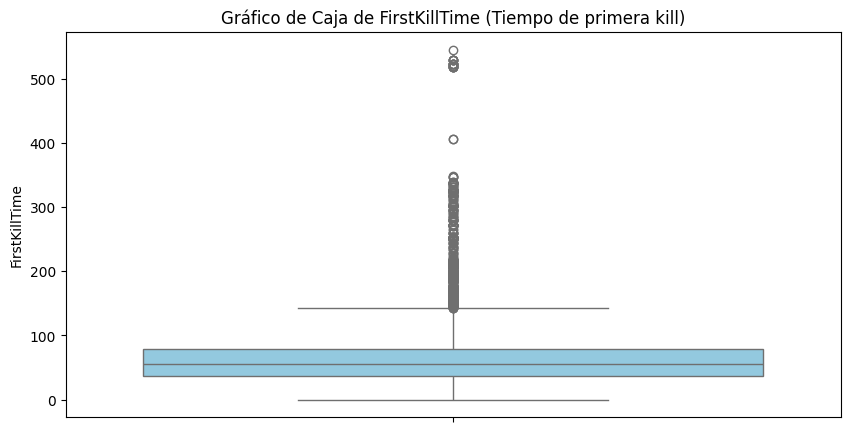


***********************************************
Cantidad de outliers de la variable FirstKillTime es: 373


In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data["FirstKillTime"], color='skyblue')
plt.title('Gráfico de Caja de FirstKillTime (Tiempo de primera kill)')
plt.ylabel('FirstKillTime')
plt.show()

# contabilizacion de los outliers (metrica)
data["z-score"] = (data["FirstKillTime"] - data["FirstKillTime"].mean()) / data["FirstKillTime"].std()
cantidad_outliers = (np.abs(data["z-score"]) > 3).sum()
print("\n***********************************************")
print("Cantidad de outliers de la variable FirstKillTime es: {}".format(cantidad_outliers))

Luego de generar el gráfico de caja, donde podemos evaluar si hay presencia de valores atípicos, podemos identificar que dentro de todo nuestro conjunto de datos, el cual posee **79,157** registros, solo hay **373** valores atípicos.

Este es un valor bastante bajo, teniendo en cuenta el volumen de nuestro conjunto de datos **(equivale al 0.47% de todos nuestros datos)**.

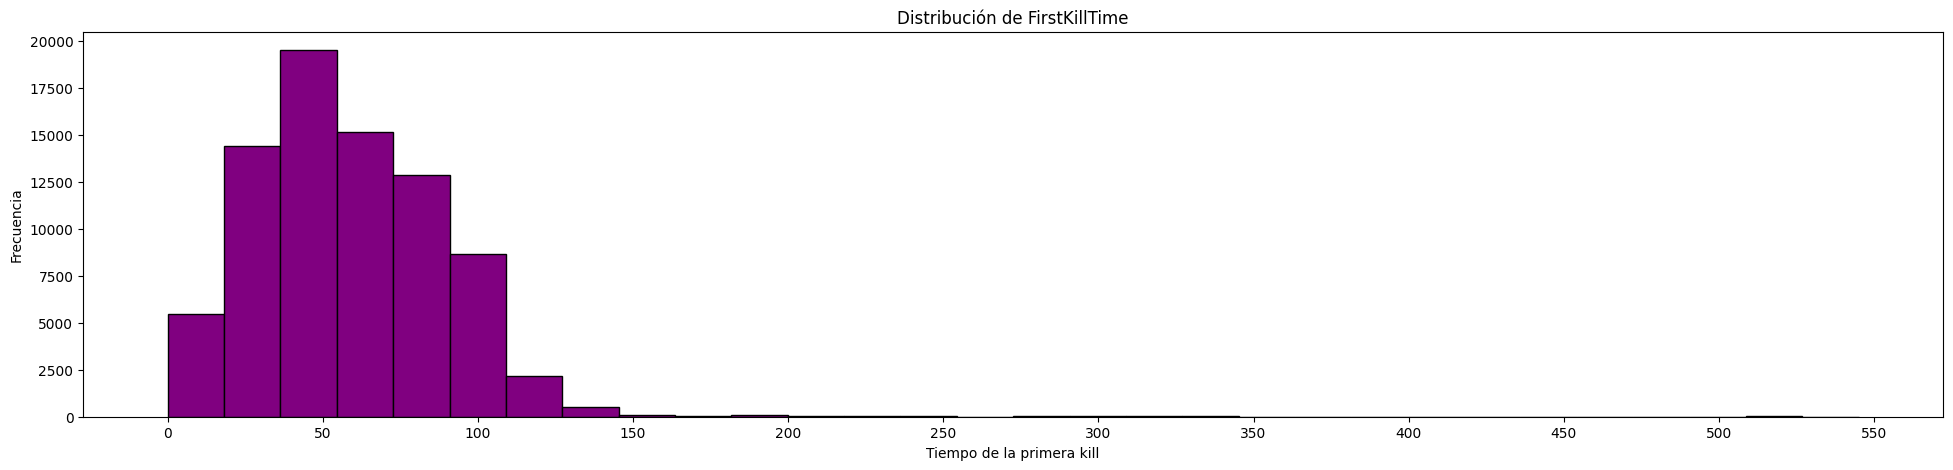

In [10]:
fig, axs = plt.subplots(1, figsize=(24, 5))

axs.hist(data['FirstKillTime'], color='purple', bins=30, edgecolor='black')
axs.set_title('Distribución de FirstKillTime')
axs.set_xlabel('Tiempo de la primera kill')
axs.set_ylabel('Frecuencia')

axs.set_xticks(range(0, int(data['FirstKillTime'].max()) + 50, 50))
axs.set_xticklabels(range(0, int(data['FirstKillTime'].max()) + 50, 50))

plt.show()

Podemos observar que nuestra variable posee una asimetría negativa, ya que la campana se encuentra más hacia la izquierda. Esto nos indica que la mayoría de nuestros datos, es decir, los valores bajos, son más frecuentes que los valores altos.

Tomando esto en cuenta, junto con la cantidad de valores atípicos, se recomienda aplicar un tratamiento **(especialmente un aislamiento)** de los valores atípicos para poder dejar los datos con una distribución lo más normal posible.


#Fase 3: Tratamiento de datos


Luego de realizar el análisis exploratorio sobre nuestras variables, decidimos incluir una variable más en nuestro conjunto de datos. La variable en cuestión es la característica **Survived**, la cual consideramos relevante para el estudio, ya que representa uno de los factores clave dentro de la partida, tomando como variable objetivo el tiempo que demora el jugador en realizar la primera muerte. En esencia, estaría bien incluir el hecho de si el jugador murió o no a la hora de realizar la primera kill.

In [11]:
data_survived = counter_strike["Survived"]

data["Survived"] = pd.get_dummies(data_survived, columns=["Survived"], drop_first=True)

Se optó por la utilización de la función get_dummies debido a las características de nuestra variable categórica Survived, la cual es booleana y, por ende, únicamente presenta los valores de True y False. Esta elección se fundamenta en la necesidad de evitar la implementación de métodos de transformación excesivamente complejos, con el objetivo de optimizar el uso de recursos y garantizar una eficiencia adecuada en el procesamiento de datos.

# Fase 4: Creación y entrenamiento de los modelos.

Como se había planteado en la fase 1, sería interesante evaluar el tiempo que demora un jugador en hacer la primera baja **(primera sangre de la ronda)**.

Dada esta información, realizaremos modelos de regresión con variables categóricas y otro sólo con variables numéricas para evaluar su rendimiento y proporcionar el mejor modelo para el negocio.

A continuación, crearemos los modelos de **DecisionTreeRegressor, LinearRegression y RandomForestRegressor**.

## Alternativa 1 (Sin variable Categórica)

In [12]:
X = pd.DataFrame(data[["TimeAlive", "AvgMatchKillDist"]])
y = pd.DataFrame(data["FirstKillTime"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=29)

In [15]:
# Creamos un array que contiene todos los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=3, min_samples_split=5, random_state=29),
    'Decision Tree II': DecisionTreeRegressor(max_depth=5, min_samples_split=6, random_state=29),
    'Random Forest': RandomForestRegressor(criterion='squared_error', max_depth=3, min_samples_split=5),
}

In [16]:
# Diccionario para guardar los modelos entrenados
resultados_1 = {}

for name, model in models.items():
  # Guardar el modelo entrenado en el diccionario
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  msle = mean_squared_log_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  score_train = model.score(X_train, y_train)
  print(f'{name:<20} - MAE: {mae:.2f} - MSLE: {msle:.4f} - R² test: {r2:.4f} - R² train: {score_train:.4f}')
  # guardamos los resultados obtenidos
  resultados_1[name] = {
    "MAE": mae,
    "MSLE": msle,
    "R² Test": r2,
    "R² Train": score_train,
    "Model": model
  }


Linear Regression    - MAE: 23.31 - MSLE: 1.2847 - R² test: 0.0668 - R² train: 0.0725
Decision Tree        - MAE: 22.46 - MSLE: 1.2611 - R² test: 0.1178 - R² train: 0.1391
Decision Tree II     - MAE: 22.32 - MSLE: 1.2577 - R² test: 0.1180 - R² train: 0.1652


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest        - MAE: 22.42 - MSLE: 1.2629 - R² test: 0.1223 - R² train: 0.1453


##Alternativa 2 (Con variable categórica)

In [17]:
X = pd.DataFrame(data[["TimeAlive", "AvgMatchKillDist", "Survived"]])

y = pd.DataFrame(data["FirstKillTime"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=29)

Al aplicar **get_dummies()**, cada categoría de la variable original se transforma en una columna binaria, lo que facilita que el modelo pueda procesar la información sin necesidad de realizar más transformaciones. Esta técnica nos resulta más útil porque se tiene una variable categórica sin un orden inherente y se busca evitar la creación de relaciones artificiales entre las categorías.

In [18]:
# Crear un array que contiene todos los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=3, min_samples_split=5, random_state=29),
    'Decision Tree II': DecisionTreeRegressor(max_depth=5, min_samples_split=6, random_state=29),
    'Random Forest': RandomForestRegressor(criterion='squared_error', max_depth=3, min_samples_split=5),
}

In [19]:
resultados_2 = {}

for name, model in models.items():
    # Guardar el modelo entrenado en el diccionario
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    msle = mean_squared_log_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    score_train = model.score(X_train, y_train)

    print(f'{name:<20} - MAE: {mae:.2f} - MSLE: {msle:.4f} - R² test: {r2:.4f} - R² train: {score_train:.4f}')

    # Guardamos los resultados obtenidos
    resultados_2[name] = {
        "MAE": mae,
        "MSLE": msle,
        "R² Test": r2,
        "R² Train": score_train,
        "Model": model
    }

Linear Regression    - MAE: 23.31 - MSLE: 1.2836 - R² test: 0.0674 - R² train: 0.0728
Decision Tree        - MAE: 22.46 - MSLE: 1.2611 - R² test: 0.1178 - R² train: 0.1391
Decision Tree II     - MAE: 22.33 - MSLE: 1.2591 - R² test: 0.1172 - R² train: 0.1652


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest        - MAE: 22.41 - MSLE: 1.2641 - R² test: 0.1228 - R² train: 0.1459


# FASE 5: EVALUACIÓN DE LOS MODELOS

## EVALUACIÓN DE MODELOS DE ALTERNATIVA 1:

Tomando los modelos de la alternativa 1 generados en la fase 4, realizaremos una comparación de las métricas obtenidas de cada uno para poder seleccionar el mejor modelo.

In [20]:

for name_model in resultados_1:
  print("**********[INTERPRETACIONES DEL MODELO {}]**********\n".format(name_model))
  interpretacion(name_model, X_train.columns, resultados_1[name_model]["R² Test"])
  print("\n")
  mae_interpretacion(name_model, resultados_1[name_model]["MAE"])
  print("\n")
  msle_interpretacion(name_model, resultados_1[name_model]["MSLE"])
  print("\n")

**********[INTERPRETACIONES DEL MODELO Linear Regression]**********

Modelo de regresión Linear Regression 6.68% de la variabilidad de tiempo que demora un jugador en realizar la primera
kill de la ronda se puede explicar utilizando las 3 caracteristicas.
Caracteristicas elegidas :['TimeAlive' 'AvgMatchKillDist' 'Survived'].


MAE: El modelo 'Linear Regression' pudo predecir que el tiempo que demora un jugador en realizar la primera kill de la ronda es ± 23.31 segundos del tiempo real.


MSLE: El modelo 'Linear Regression' pudo predecir el tiempo que demora un jugador en realizar la primera
kill de la ronda es de  ±  128.47% del tiempo real.


**********[INTERPRETACIONES DEL MODELO Decision Tree]**********

Modelo de regresión Decision Tree 11.78% de la variabilidad de tiempo que demora un jugador en realizar la primera
kill de la ronda se puede explicar utilizando las 3 caracteristicas.
Caracteristicas elegidas :['TimeAlive' 'AvgMatchKillDist' 'Survived'].


MAE: El modelo 'Decision T

En base a los resultados obtenidos y el bajo rendimiento de los modelos, se decidió optar por el R² o coeficiente de determinación como métrica relevante para la elección del mejor modelo de predicción. Esto se debe a que el bajo rendimiento del modelo nos entrega valores de **MAE** y **MSLE** erróneos; es decir, si nos basamos únicamente en esas métricas, el modelo podría entregarnos datos que se consideran errores del negocio **(gente con tiempo de primera kill en negativo)**.

El mejor modelo de la alternativa 1 es el modelo **RandomForest**, ya que, si bien hay otro modelo con un mejor rendimiento, la diferencia entre el rendimiento obtenido en entrenamiento y el rendimiento obtenido en prueba, en el caso del Random Forest, es mucho menor.

`Diferencia:`



In [27]:
print(f"""

Con base en el rendimiento del modelo RandomForest  tanto en prueba como en entrenamiento,
podemos llegar a la conclusión de que nuestro modelo no se encuentra sobreajustado,
dado que la diferencia del R² entre entrenamiento ({resultados_1["Random Forest"]["R² Train"]:.4f})
y prueba ({resultados_1["Random Forest"]["R² Test"]:.4f}) es la minima en comparacion a los otros modelos,
lo cual indica que el modelo está generalizando de manera correcta y se comporta
adecuadamente con datos desconocidos.

Por lo tanto, este calificaría como el mejor modelo, en base a los resultados de los demás.

""")



Con base en el rendimiento del modelo RandomForest  tanto en prueba como en entrenamiento, 
podemos llegar a la conclusión de que nuestro modelo no se encuentra sobreajustado, 
dado que la diferencia del R² entre entrenamiento (0.1453) 
y prueba (0.1223) es la minima en comparacion a los otros modelos, 
lo cual indica que el modelo está generalizando de manera correcta y se comporta 
adecuadamente con datos desconocidos.

Por lo tanto, este calificaría como el mejor modelo, en base a los resultados de los demás.




## EVALUACIÓN DE MODELOS ALTERNATIVA 2:


In [28]:
for name_model in resultados_2:
  print("**********[INTERPRETACIONES DEL MODELO {}]**********\n".format(name_model))
  interpretacion(name_model, X_train.columns, resultados_1[name_model]["R² Test"])
  print("\n")
  mae_interpretacion(name_model, resultados_1[name_model]["MAE"])
  print("\n")
  msle_interpretacion(name_model, resultados_1[name_model]["MSLE"])
  print("\n")

**********[INTERPRETACIONES DEL MODELO Linear Regression]**********

Modelo de regresión Linear Regression 6.68% de la variabilidad de tiempo que demora un jugador en realizar la primera
kill de la ronda se puede explicar utilizando las 3 caracteristicas.
Caracteristicas elegidas :['TimeAlive' 'AvgMatchKillDist' 'Survived'].


MAE: El modelo 'Linear Regression' pudo predecir que el tiempo que demora un jugador en realizar la primera kill de la ronda es ± 23.31 segundos del tiempo real.


MSLE: El modelo 'Linear Regression' pudo predecir el tiempo que demora un jugador en realizar la primera
kill de la ronda es de  ±  128.47% del tiempo real.


**********[INTERPRETACIONES DEL MODELO Decision Tree]**********

Modelo de regresión Decision Tree 11.78% de la variabilidad de tiempo que demora un jugador en realizar la primera
kill de la ronda se puede explicar utilizando las 3 caracteristicas.
Caracteristicas elegidas :['TimeAlive' 'AvgMatchKillDist' 'Survived'].


MAE: El modelo 'Decision T

En el caso de la alternativa 2, donde se incluyó una variable categórica en el estudio que conlleva una gran relevancia, los rendimientos de los modelos siguen siendo bajos **(similares a los de la alternativa 1)**, por lo que se utilizará el mismo método de elección que en la alternativa 1: utilizar el **R²** como métrica relevante para la selección.

Con base en esto, el mejor modelo de la alternativa 2 sería el Random Forest, ya que, al igual que en la alternativa 1, mantiene un rendimiento similar tanto en entrenamiento como en prueba.

`Diferencia:`


In [29]:
print(f"""

Con base en el rendimiento del modelo RandomForest  tanto en prueba como en entrenamiento,
podemos llegar a la conclusión de que nuestro modelo no se encuentra sobreajustado,
dado que la diferencia del R² entre entrenamiento ({resultados_2["Random Forest"]["R² Train"]:.4f})
y prueba ({resultados_2["Random Forest"]["R² Test"]:.4f}) es la minima en comparacion a los otros modelos,
lo cual indica que el modelo está generalizando de manera correcta y se comporta
adecuadamente con datos desconocidos.

Por lo tanto, este calificaría como el mejor modelo, en base a los resultados de los demás.

""")



Con base en el rendimiento del modelo RandomForest  tanto en prueba como en entrenamiento, 
podemos llegar a la conclusión de que nuestro modelo no se encuentra sobreajustado, 
dado que la diferencia del R² entre entrenamiento (0.1459) 
y prueba (0.1228) es la minima en comparacion a los otros modelos, 
lo cual indica que el modelo está generalizando de manera correcta y se comporta 
adecuadamente con datos desconocidos.

Por lo tanto, este calificaría como el mejor modelo, en base a los resultados de los demás.




# FASE 6: DESPLIEGUE DE LOS MODELOS

In [30]:
#Caracteristicas de los modelos
X.columns

Index(['TimeAlive', 'AvgMatchKillDist', 'Survived'], dtype='object')

**Caracteristicas de la alternativa 1:**

Las caracateristicas que se solicitan en los archivos JSON para la prediccion del modelo de la alternativa 1 son las siguientes:

- TimeAlive
- AvgMatchKillDist

**Caracteristicas de la alternativa 2:**

Las caracateristicas que se solicitan en los archivos JSON para la prediccion del modelo de la alternativa 1 son las siguientes:

- TimeAlive
- AvgMatchKillDist
- Survived

##Alternativa 1


In [31]:
Modelo = resultados_1['Random Forest']["Model"]

file_model = open('fw_model_1.pkl', 'wb')

pickle.dump(Modelo , file_model)

file_model.close()

##Alternativa 2

In [32]:
Modelo = resultados_2['Random Forest']["Model"]

file_model = open('fw_model_2.pkl', 'wb')

pickle.dump(Modelo , file_model)

file_model.close()

# Conclusión (Pregunta Final)

En conclusión, con los resultados obtenidos, si bien se seleccionó el mejor modelo de cada una de las alternativas, no es recomendable utilizar ninguno para producción **(buscar cumplir con el objetivo)**, ya que en este primer ciclo los modelos, en general, poseen un rendimiento demasiado bajo.

Debido a esto, se dejará una lista de recomendaciones para poder elevar el rendimiento del modelo y entregar una predicción más acertiva y cercana a la realidad.

**Recomendaciones:**

- Aplicar normalización sobre los datos: Esto permitirá llevar todos los datos a un mismo formato de cantidad y evitar que haya valores con distintas unidades, **como miles, millones, etc.**

- Aplicar tratamiento de valores atípicos: Esto permitirá reemplazar o aislar los valores que puedan disparar nuestras métricas **(especialmente la media)** y permitir que nuestros datos se distribuyan de una manera más normal.

- Incluir más características relevantes al estudio: Tal como se mencionó en la **fase 1 (algunas de las posibles características)**, sería ideal evaluar qué otras características NO incluidas tienen relación con el tiempo de la primera kill e incluirlas dentro del conjunto de datos para poder mejorar el rendimiento del modelo.

Tomando en cuenta esa lista de recomendaciones, es preferible realizar otro ciclo sobre las fases, considerando nuevos datos y otros tipos de tratamiento para preparar mejor el modelo y lograr un rendimiento aceptable para la producción.

